In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2

# Feature Selection

## Correlation Matrix

In [ ]:
def calculate_correlation_matrix(df):
  # Calculate the correlation matrix
  corr_matrix = df.corr()

  # Generate a mask for the upper triangle
  mask = corr_matrix.mask(np.triu(np.ones_like(corr_matrix), k=1).astype(bool))

  # Plot the heatmap
  plt.figure(figsize=(35, 35))
  sns.heatmap(mask, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix')
  plt.show()

## Mutual Information

In [ ]:
def calculate_mutual_information(df):
  # Separate features and target
  X = df.drop('Attrition', axis=1)
  y = df['Attrition']

  # Calculate mutual information
  mutual_info = mutual_info_classif(X, y)

  # Create a DataFrame to visualize the results
  mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
  mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

  # Print the DataFrame
  print(mutual_info_df)

  # Plot the mutual information scores
  plt.figure(figsize=(10, 8))
  sns.barplot(x='Mutual Information', y='Feature', data=mutual_info_df)
  plt.title('Mutual Information with Attrition')
  plt.show()
  return mutual_info_df

## Chi-squared Test

In [ ]:
def calculate_chi_squared(df):
  chi_squared_df = df

  # Separate features and target
  X = chi_squared_df.drop('Attrition', axis=1)
  y = chi_squared_df['Attrition']

  # Apply Chi-Square test
  chi2_selector = SelectKBest(chi2, k='all')  # Select all features based on Chi-Square scores
  X_kbest = chi2_selector.fit_transform(X, y)

  # Display Chi-Square scores for each feature
  chi2_scores = chi2_selector.scores_
  p_values = chi2_selector.pvalues_

  # Create a DataFrame to show the feature names, Chi-Square scores, and p-values
  results = pd.DataFrame({
      'Feature': X.columns,
      'Chi-Square Score': chi2_scores,
      'p-value': p_values
  })
  #print(results)

  # Sort the results DataFrame by Chi-Square Score
  results_sorted = results.sort_values(by='Chi-Square Score', ascending=False)

  # Plot the Chi-Square scores
  plt.figure(figsize=(8, 10))
  #plt.bar(results_sorted['Feature'], results_sorted['Chi-Square Score'])
  sns.barplot(x=results_sorted['Chi-Square Score'], y=results_sorted['Feature'])
  plt.xlabel('Chi-Squared Score (log-scaled)')
  plt.ylabel('Features')
  plt.title('Chi-Squared Scores for Features')
  plt.xscale('log')  # Use logarithmic scale for better visualization of small values
  plt.show()

  #more_significant_features = results[results['p-value'] < 0.05]
  less_significant_features = results[results['p-value'] >= 0.5]

  #print(more_significant_features)
  #print('\n')
  print(less_significant_features)
  return less_significant_features

# For Large Dataset

In [ ]:
large_train_df_encoded = pd.read_csv('large_train_df_encoded.csv')
large_test_df_encoded = pd.read_csv('large_test_df_encoded.csv')

In [ ]:
merged_large_df = pd.concat([large_train_df_encoded, large_test_df_encoded], axis=0)

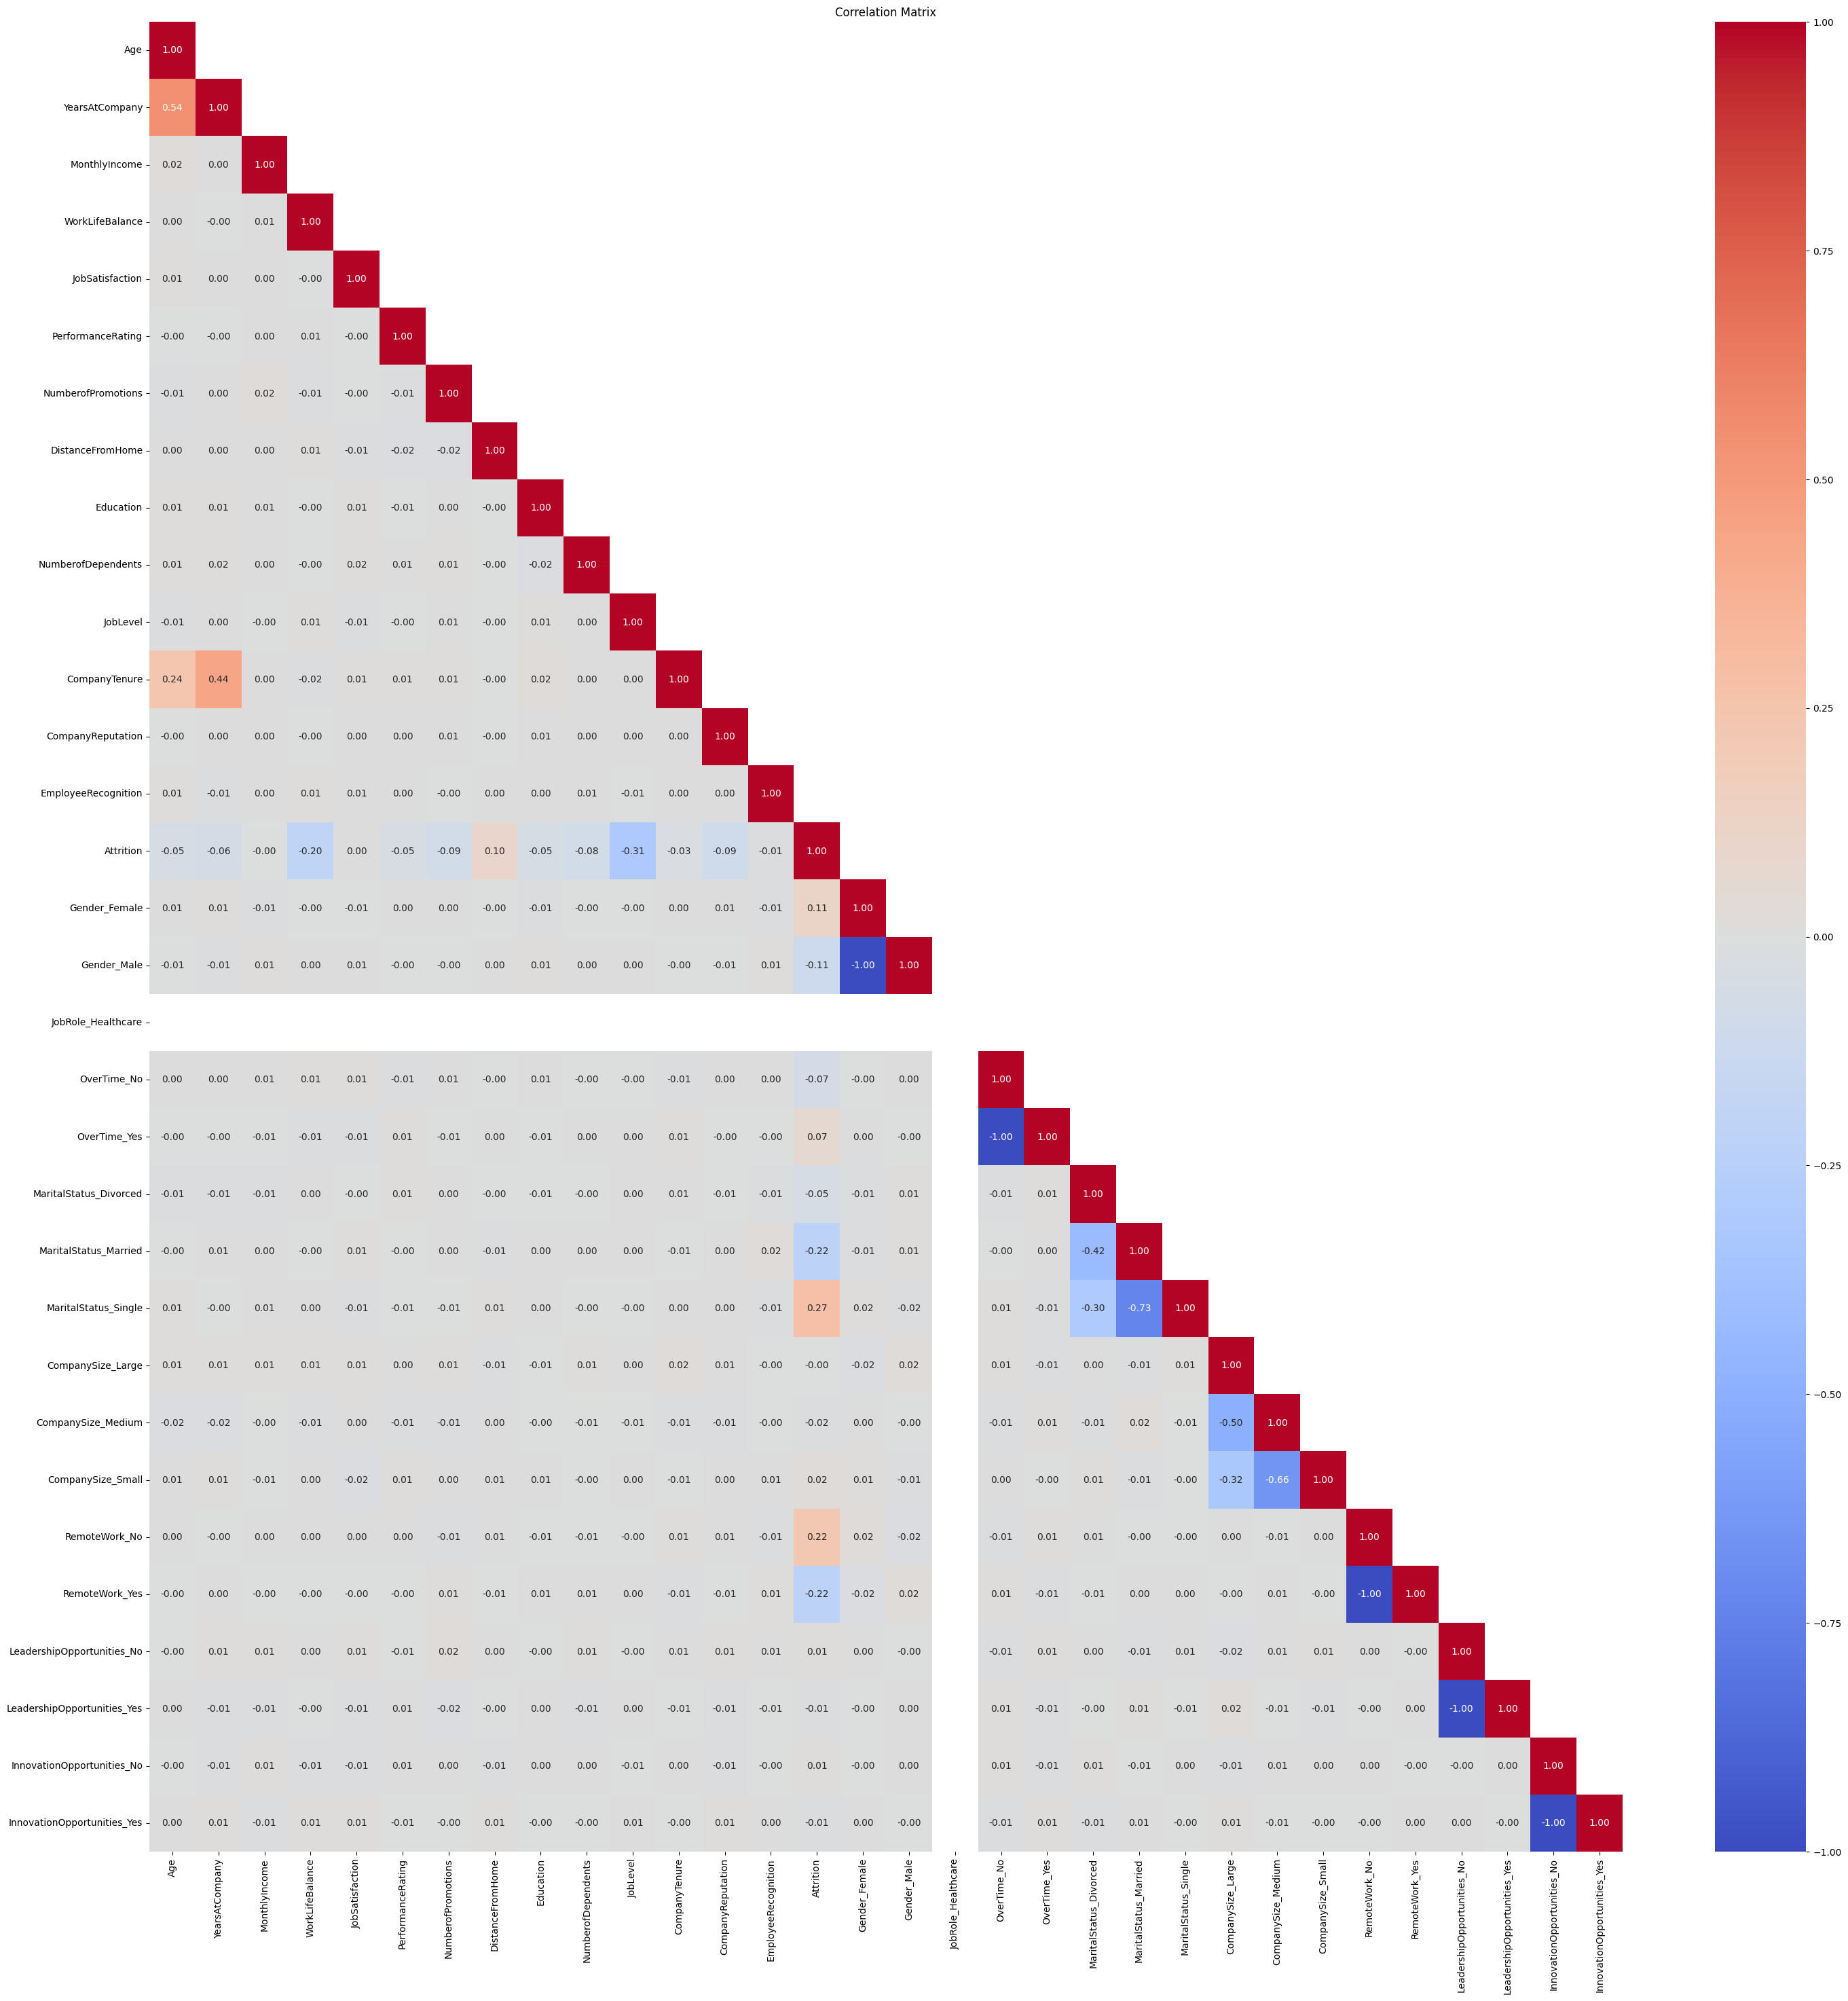

In [ ]:
calculate_correlation_matrix(merged_large_df)

In [ ]:
# From correlation matrix: columns to remove are listed below
cols_to_remove = ['JobRole_Healthcare',
                  'Gender_Female',
                  'OverTime_No',
                  'RemoteWork_No',
                  'LeadershipOpportunities_No',
                  'InnovationOpportunities_No']

                        Feature  Mutual Information
10                     JobLevel            0.048387
21         MaritalStatus_Single            0.040512
20        MaritalStatus_Married            0.031506
26               RemoteWork_Yes            0.028037
25                RemoteWork_No            0.026521
3               WorkLifeBalance            0.021387
29   InnovationOpportunities_No            0.009868
24            CompanySize_Small            0.008854
7              DistanceFromHome            0.008748
18                 OverTime_Yes            0.007953
6            NumberofPromotions            0.007641
9            NumberofDependents            0.007632
17                  OverTime_No            0.007428
8                     Education            0.007234
12            CompanyReputation            0.007148
14                Gender_Female            0.006845
15                  Gender_Male            0.006067
1                YearsAtCompany            0.005403
13          

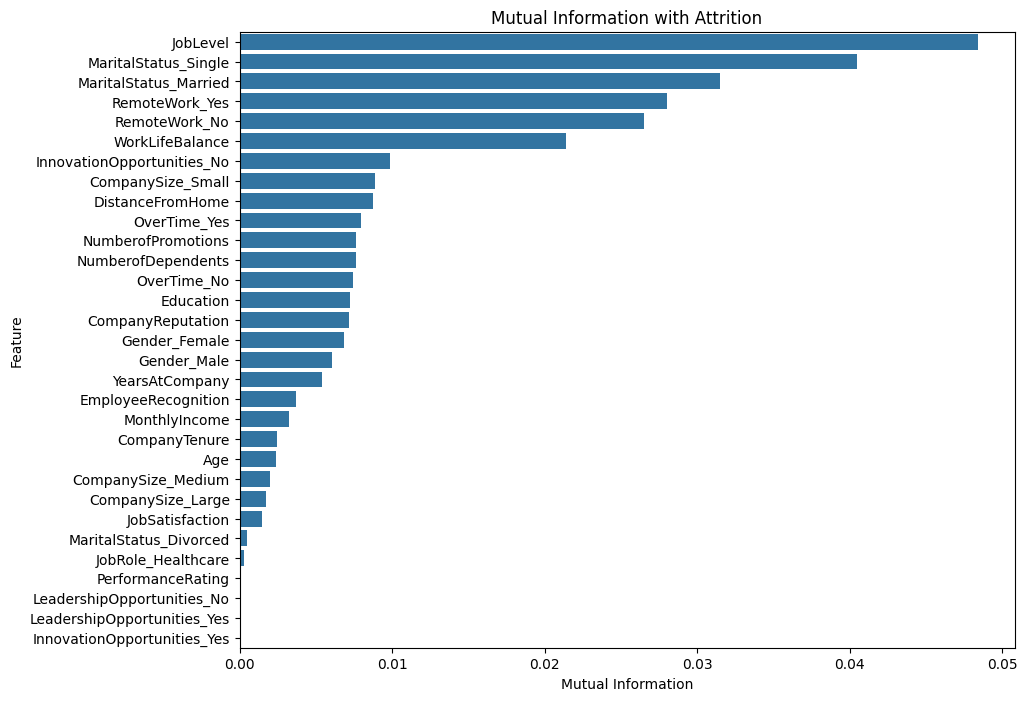

In [ ]:
res_mutual_info = calculate_mutual_information(merged_large_df)

In [ ]:
cols_to_remove.extend(res_mutual_info[res_mutual_info['Mutual Information'] == 0.00]['Feature'].tolist())

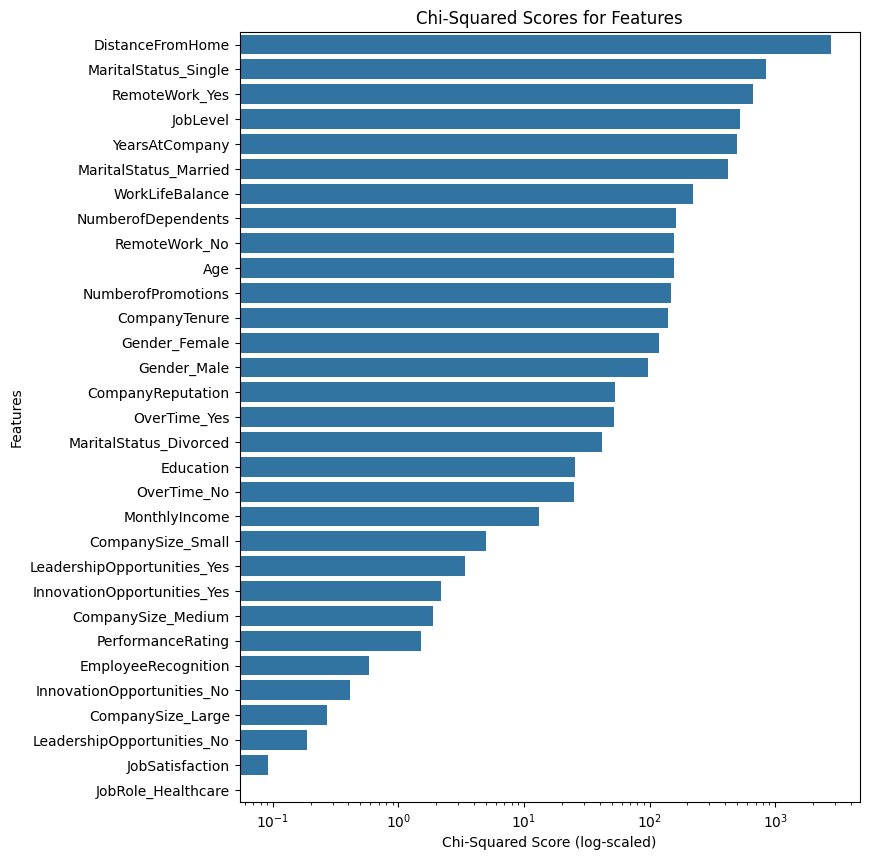

                       Feature  Chi-Square Score   p-value
4              JobSatisfaction          0.091265  0.762575
16          JobRole_Healthcare          0.000000  1.000000
22           CompanySize_Large          0.269357  0.603764
27  LeadershipOpportunities_No          0.186923  0.665490
29  InnovationOpportunities_No          0.413836  0.520029


In [ ]:
res_chi_square = calculate_chi_squared(merged_large_df)

In [ ]:
cols_to_remove.extend(res_chi_square['Feature'].tolist())

In [ ]:
cols_to_remove

['JobRole_Healthcare',
 'Gender_Female',
 'OverTime_No',
 'RemoteWork_No',
 'LeadershipOpportunities_No',
 'InnovationOpportunities_No',
 'PerformanceRating',
 'LeadershipOpportunities_No',
 'LeadershipOpportunities_Yes',
 'InnovationOpportunities_Yes',
 'JobSatisfaction',
 'JobRole_Healthcare',
 'CompanySize_Large',
 'LeadershipOpportunities_No',
 'InnovationOpportunities_No']

In [ ]:
unique_cols_to_remove = list(set(cols_to_remove))
unique_cols_to_remove

['OverTime_No',
 'RemoteWork_No',
 'InnovationOpportunities_Yes',
 'JobSatisfaction',
 'CompanySize_Large',
 'LeadershipOpportunities_No',
 'JobRole_Healthcare',
 'PerformanceRating',
 'Gender_Female',
 'LeadershipOpportunities_Yes',
 'InnovationOpportunities_No']

In [ ]:
len(unique_cols_to_remove)

11

In [ ]:
large_train_df_encoded = large_train_df_encoded.drop(columns=unique_cols_to_remove)
large_test_df_encoded = large_test_df_encoded.drop(columns=unique_cols_to_remove)

# For Small Dataset

In [ ]:
small_train_df_encoded = pd.read_csv('small_train_df_encoded.csv')
small_test_df_encoded = pd.read_csv('small_test_df_encoded.csv')

In [ ]:
merged_small_df = pd.concat([small_train_df_encoded, small_test_df_encoded], axis=0)

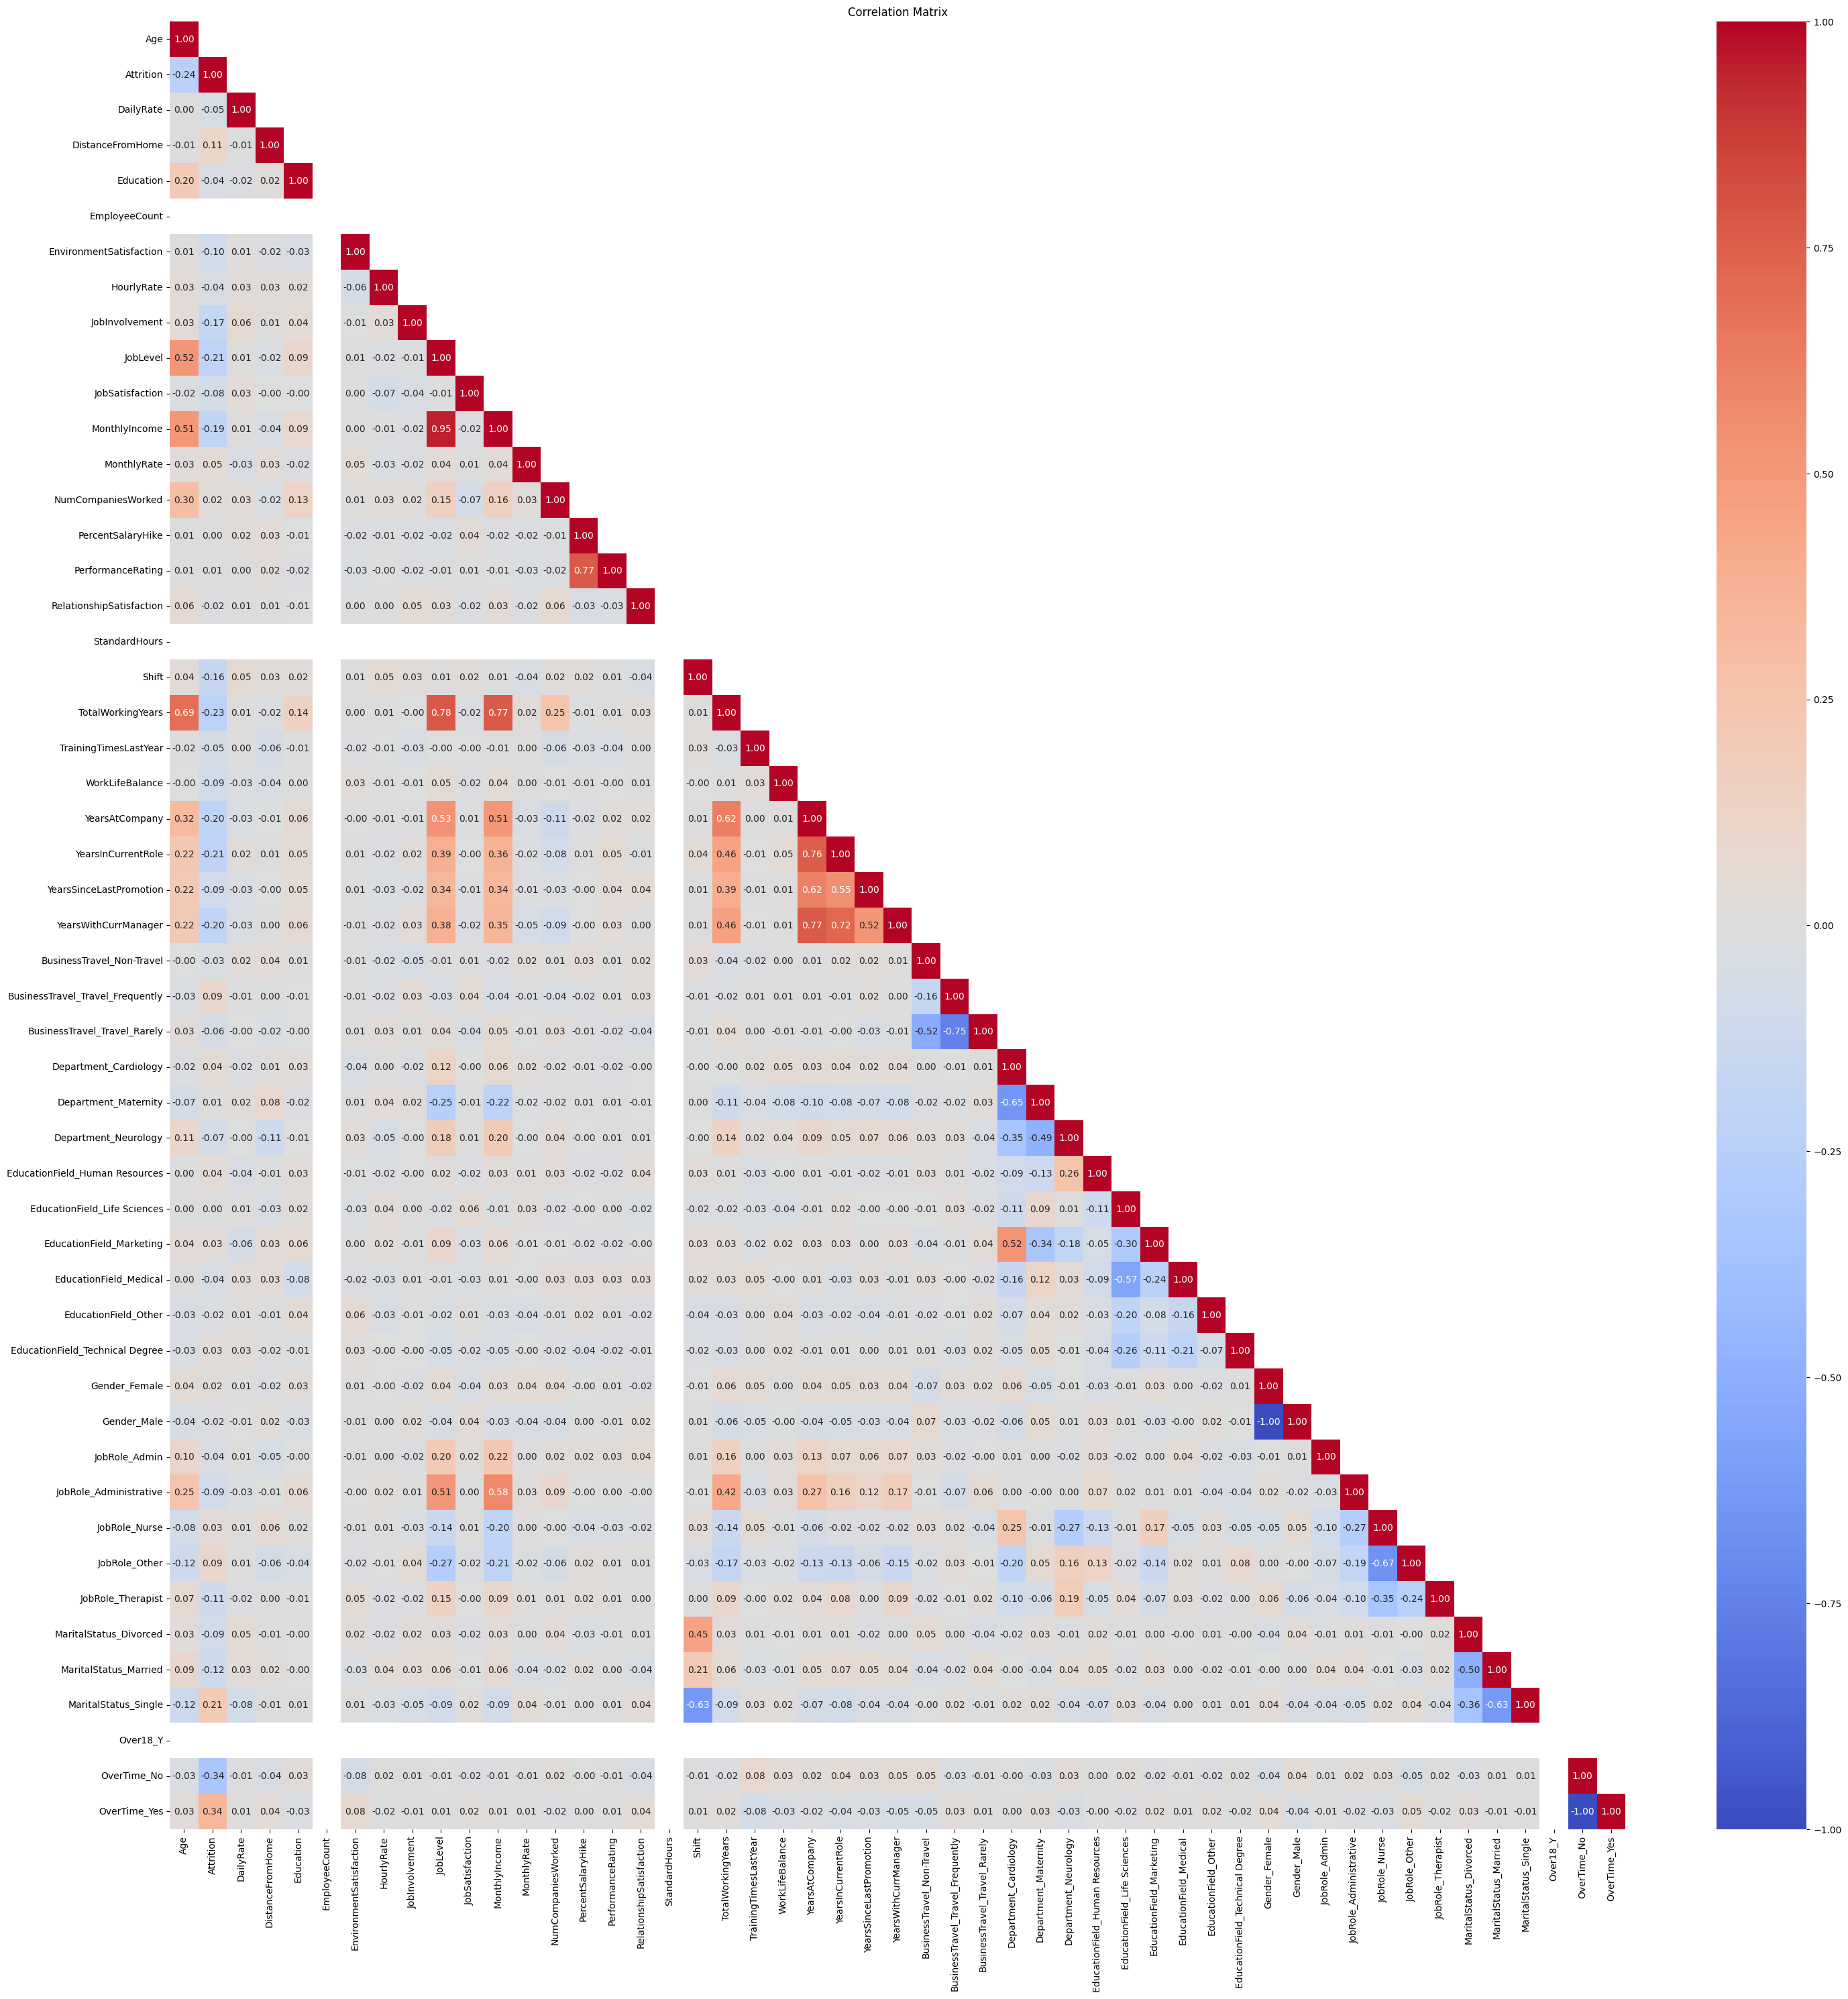

In [ ]:
calculate_correlation_matrix(merged_small_df)

In [ ]:
# From correlation matrix: columns to remove are listed below
cols_to_remove = []
cols_to_remove = ['StandardHours',
                  'EmployeeCount',
                  'Over18_Y',
                  'OverTime_No',
                  'Gender_Female']

                             Feature  Mutual Information
48                       OverTime_No            0.053612
18                 TotalWorkingYears            0.052442
49                      OverTime_Yes            0.049209
10                     MonthlyIncome            0.042569
0                                Age            0.040112
21                    YearsAtCompany            0.035415
24              YearsWithCurrManager            0.034124
8                           JobLevel            0.031193
46              MaritalStatus_Single            0.022673
17                             Shift            0.021824
22                YearsInCurrentRole            0.021497
1                          DailyRate            0.018218
13                 PercentSalaryHike            0.016875
19             TrainingTimesLastYear            0.016683
39                     JobRole_Admin            0.015870
2                   DistanceFromHome            0.015099
11                       Monthl

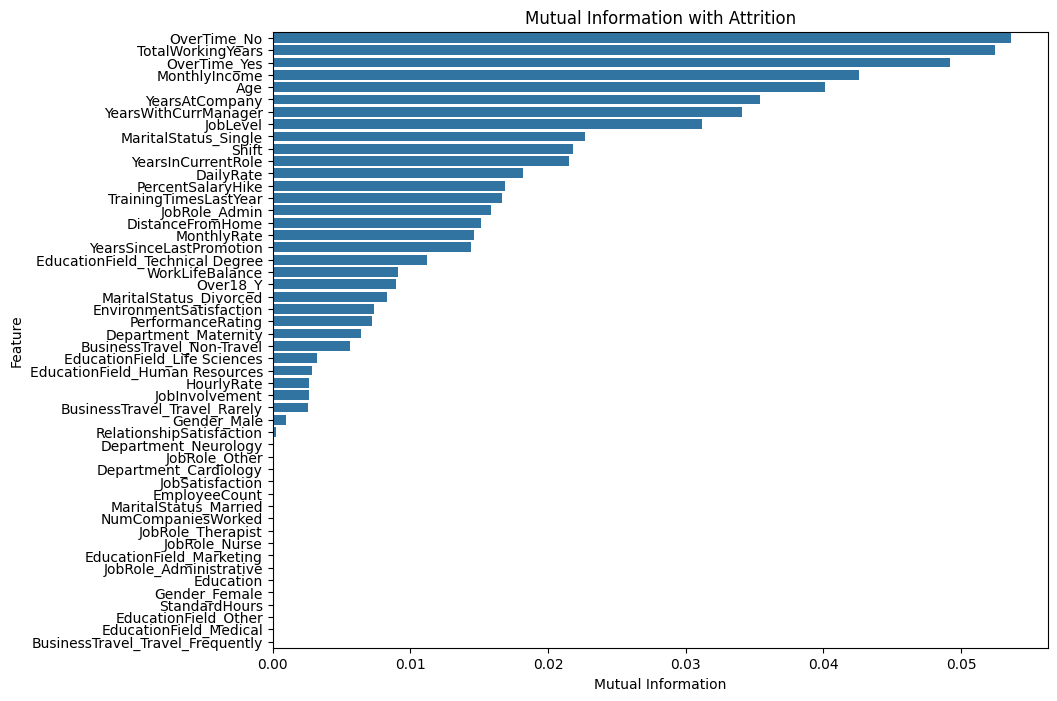

In [ ]:
res_mutual_info = calculate_mutual_information(merged_small_df)

In [ ]:
cols_to_remove.extend(res_mutual_info[res_mutual_info['Mutual Information'] == 0.00]['Feature'].tolist())

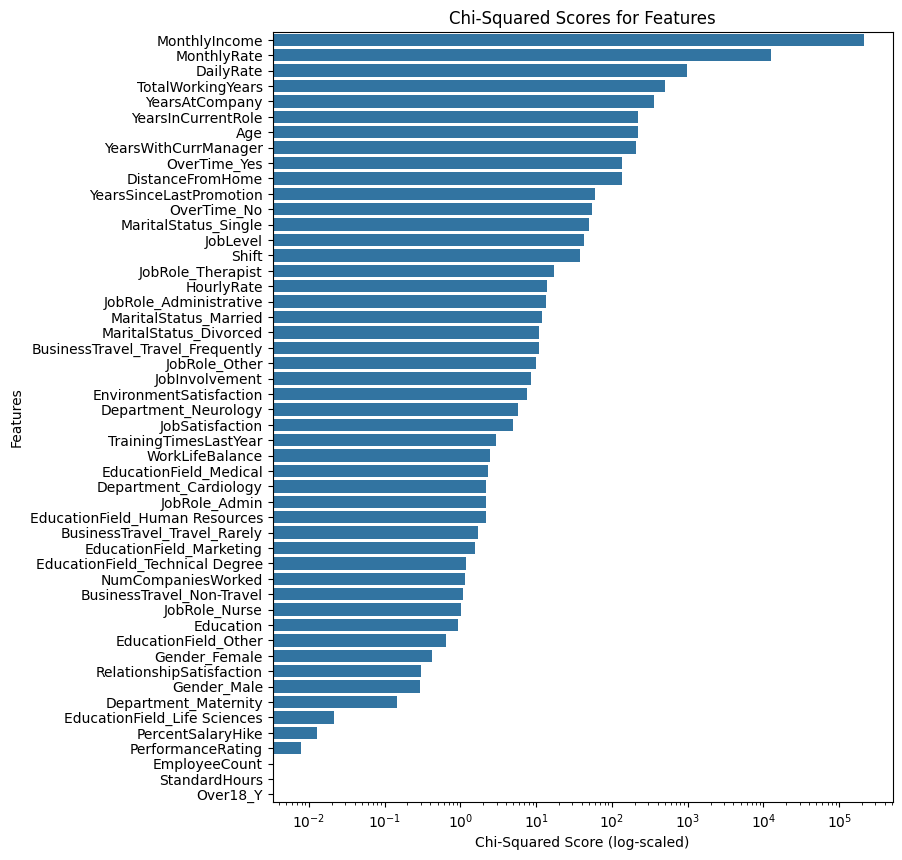

                         Feature  Chi-Square Score   p-value
4                  EmployeeCount          0.000000  1.000000
13             PercentSalaryHike          0.012698  0.910279
14             PerformanceRating          0.007821  0.929528
15      RelationshipSatisfaction          0.299901  0.583944
16                 StandardHours          0.000000  1.000000
29          Department_Maternity          0.145973  0.702413
32  EducationField_Life Sciences          0.021139  0.884402
37                 Gender_Female          0.426023  0.513947
38                   Gender_Male          0.289423  0.590591
47                      Over18_Y          0.000000  1.000000


In [ ]:
res_chi_square = calculate_chi_squared(merged_small_df)

In [ ]:
cols_to_remove.extend(res_chi_square['Feature'].tolist())

In [ ]:
cols_to_remove

['StandardHours',
 'EmployeeCount',
 'Over18_Y',
 'OverTime_No',
 'Gender_Female',
 'Department_Neurology',
 'JobRole_Other',
 'Department_Cardiology',
 'JobSatisfaction',
 'EmployeeCount',
 'MaritalStatus_Married',
 'NumCompaniesWorked',
 'JobRole_Therapist',
 'JobRole_Nurse',
 'EducationField_Marketing',
 'JobRole_Administrative',
 'Education',
 'Gender_Female',
 'StandardHours',
 'EducationField_Other',
 'EducationField_Medical',
 'BusinessTravel_Travel_Frequently',
 'EmployeeCount',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'Department_Maternity',
 'EducationField_Life Sciences',
 'Gender_Female',
 'Gender_Male',
 'Over18_Y']

In [ ]:
unique_cols_to_remove = list(set(cols_to_remove))
unique_cols_to_remove

['StandardHours',
 'Over18_Y',
 'PerformanceRating',
 'EducationField_Medical',
 'MaritalStatus_Married',
 'Education',
 'Department_Neurology',
 'JobRole_Other',
 'EducationField_Other',
 'PercentSalaryHike',
 'JobRole_Administrative',
 'EducationField_Marketing',
 'JobSatisfaction',
 'JobRole_Nurse',
 'JobRole_Therapist',
 'OverTime_No',
 'Gender_Male',
 'EducationField_Life Sciences',
 'BusinessTravel_Travel_Frequently',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'EmployeeCount',
 'Department_Cardiology',
 'Department_Maternity',
 'Gender_Female']

In [ ]:
len(unique_cols_to_remove)

25

In [ ]:
small_train_df_encoded = small_train_df_encoded.drop(columns=unique_cols_to_remove)
small_test_df_encoded = small_test_df_encoded.drop(columns=unique_cols_to_remove)

In [ ]:
large_train_df_encoded.to_csv('large_train_df_encoded_processed.csv', index=False)
large_test_df_encoded.to_csv('large_test_df_encoded_processed.csv', index=False)
small_train_df_encoded.to_csv('small_train_df_encoded_processed.csv', index=False)
small_test_df_encoded.to_csv('small_test_df_encoded_processed.csv', index=False)

In [ ]:
large_train_df_encoded_processed = pd.read_csv('large_train_df_encoded_processed.csv')
large_test_df_encoded_processed = pd.read_csv('large_test_df_encoded_processed.csv')
small_train_df_encoded_processed = pd.read_csv('small_train_df_encoded_processed.csv')
small_test_df_encoded_processed = pd.read_csv('small_test_df_encoded_processed.csv')

common_columns = set(large_train_df_encoded_processed.columns) & set(large_test_df_encoded_processed.columns) & set(small_train_df_encoded_processed.columns) & set(small_test_df_encoded_processed.columns)

large_train_df_common = large_train_df_encoded_processed[list(common_columns)]
large_test_df_common = large_test_df_encoded_processed[list(common_columns)]
small_train_df_common = small_train_df_encoded_processed[list(common_columns)]
small_test_df_common = small_test_df_encoded_processed[list(common_columns)]

print(f"Common columns: {common_columns}")


Common columns: {'MonthlyIncome', 'Age', 'YearsAtCompany', 'JobLevel', 'DistanceFromHome', 'WorkLifeBalance', 'Attrition', 'MaritalStatus_Single', 'MaritalStatus_Divorced', 'OverTime_Yes'}


In [ ]:
large_train_df_common.to_csv('large_train_df_encoded_processed_common.csv', index=False)
large_test_df_common.to_csv('large_test_df_encoded_processed_common.csv', index=False)
small_train_df_common.to_csv('small_train_df_encoded_processed_common.csv', index=False)
small_test_df_common.to_csv('small_test_df_encoded_processed_common.csv', index=False)